# MRI Math Concepts

## Complex Numbers

$$c = a + i b = A\exp(i \phi)$$
$$ i = \sqrt{-1}, \,
\exp(i \phi) = \cos \phi + i \sin\phi$$
$$ |c| = A = \sqrt{a^2+b^2}$$
$$ \phi = \tan^{-1} (b/a)$$


## Impulse Function

The impulse (or delta) funcion, $\delta(x)$, can be used to represent sampling of a continuous signal, and has the following properties:

- $\delta(x) = 0$ for all $x \ne 0$
- $\delta(x) \rightarrow \infty$ at $x =0$
- $\int_{-\infty}^\infty \delta(x) dx = 1$
- $\delta(ax) = \frac{1}{|a|} \delta(x)$
- $f(x) \delta(x) = f(0) \delta(x)$
- $f(x) \ast \delta(x) = f(x)$


### Impulse train sampling function

To represent discrete sampling, a train of impulse functions is used.  This is known as Dirac Comb function, also the sha, impulse train, or sampling function:

$$Ш(x) = \sum_{n = -\infty}^\infty \delta(x - n)$$

## Other Functions

Rectangle function

$$\mathrm{rect}(x) = \sqcap(x) = 
\left\{ 
  \begin{array}{l l}
    1 & \quad |x| < 1/2 \\
    1/2 & \quad |x| = 1/2 \\
    0 & \quad |x| > 1/2 \\
  \end{array} \right. $$



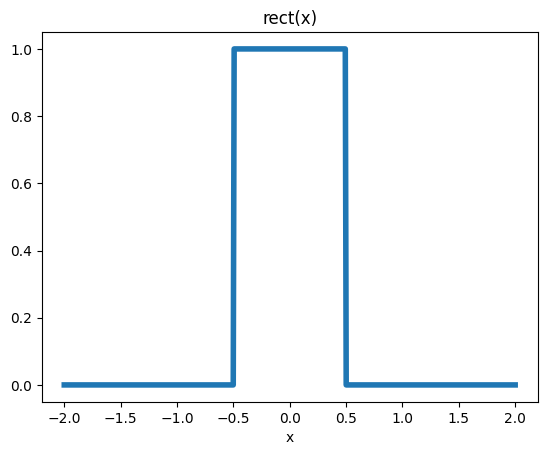

In [1]:
import numpy as np

import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 500)
rect = np.ones_like(x)
rect[np.abs(x) > 0.5] = 0
rect[np.abs(x) == 0.5] = 0.5

plt.plot(x, rect, linewidth=4)
plt.xlabel('x')
plt.title('rect(x)')
plt.show()

Sinc (normalized)

$$\mathrm{sinc}(x) = \frac{\sin(\pi x)}{\pi x}$$


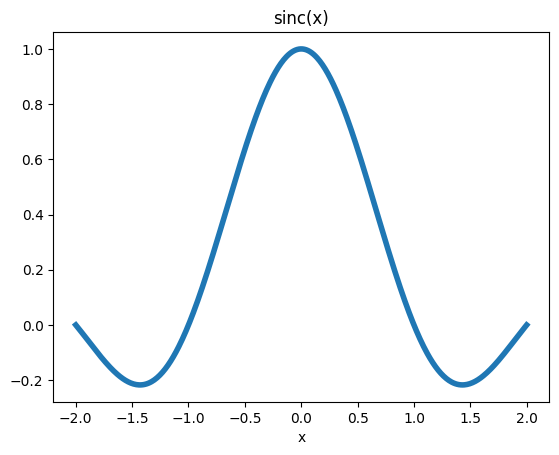

In [2]:
plt.plot(x, np.sinc(x), linewidth=4)
plt.xlabel('x')
plt.title('sinc(x)')
plt.show()


## Convolution
The convolution operation $\ast$, is defined as:

$$ g(x) \ast h(x) = \int_{-\infty}^\infty g(x-\tau) h(\tau) d\tau$$

The intuition of convolution is that one of functions is reversed, slid in the convolution dimension relative to the other function, and the area of the functions multiplied at each location is the output, which is nicely illustrated in this example from https://en.wikipedia.org/wiki/Convolution

![Convolution Illustration](images/Convolution_of_box_signal_with_itself2.gif)

## Fourier Transforms

The Fourier transform allows for determination of the frequencies present in the original function.  The Fourier transform (FT) operation, $ \mathcal{F} \{ \cdot \}$, of a complex-valued function, $f(x)$, is:

$$ \mathcal{F} \{ f(x) \} = F(k_x) = \int_{-\infty}^\infty f(x) \exp(-i 2 \pi k_x x) dx$$

(Unitary, ordinary frequency)

Note that the pair of variables used - $x$ used to represent space and $k_x$ used to represent spatial frequency, can be swapped for other variables. Most commonly the other variables are $t$ used to represent time and $f$ used to represent frequency.

### Inverse Fourier Transform:
$$ \mathcal{F}^{-1} \{ F(k_x) \} = f(x) = \int_{-\infty}^\infty F(k_x) \exp(+i 2 \pi x k_x) dk_x$$

### 2-D Fourier Transform
$$ F(k_x,k_y) = \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y) \exp(-i 2 \pi (k_x x + k_y y) ) dx dy$$

### N-D Fourier Transform
$$ F(\vec{k}) = \int_{-\infty}^\infty f(\vec{x}) \exp(-i 2 \pi \vec{k}\cdot \vec{x}) d\vec{x}$$

### Duality
$$\mathcal{F}\{f(x)\} = F(k_x)$$
$$\mathcal{F}\{F(x)\} = f(-k_x)$$
$$\mathcal{F}\{F(-x)\} = f(k_x)$$

### Separable

If $f(x,y) = f_x(x) f_y(y)$, then $\mathcal{F}\{f(x,y)\} = \mathcal{F}\{f_x(x)\} \mathcal{F}\{f_y(y)\}$




## Fourier Transform Identities and Pairs
For 
$\mathcal{F}\{f(x)\} = F(k_x), \mathcal{F}\{g(x)\} = G(k_x)$:

| &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp;  Function  &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp;    |  &nbsp; &nbsp;&nbsp;&nbsp;   Fourier    Transform   &nbsp; &nbsp; &nbsp; &nbsp; |
| :--- | --- | 
| $\delta(x)$ | 1 |  
| 1 | $\delta(k_x)$ | 
| Ш(x) | Ш(k_x) |
| $\mathrm{rect}(x)$ | $\mathrm{sinc}(k_x)$  | 
| $f(ax)$ | $\frac{1}{\|a\|} F(\frac{k_x}{a})$ | 
| $a \cdot f(x) + b \cdot g(x)$ | $a \cdot F(k_x) + b \cdot G(k_x)$  | 
| $f(x-a)$ | $\exp(-i 2\pi a k_x) F(k_x)$ | 
| $\exp(i 2\pi a x) f(x)$ | $F(k_x - a)$ | 
| $\delta(x-a)$ | $\exp(-i 2\pi a k_x) $ | 
| $\exp(i 2\pi a x) $ | $\delta(k_x - a)$ | 
| $f(x) \ast g(x)$ | $F(k_x) G(k_x)$  | 
| $f(x) g(x)$ | $F(k_x) \ast G(k_x)$  | 


## Fourier Transform Example - Truncated k-space data

Based on the identities above, we can derive that the Fourier Transform of a sinc() function is a rect() function.  This is relevant for MRI as we can use a rect() function to represent finite sampling of the data:

$$\mathcal{F}\{\mathrm{sinc(x)}\} = \mathrm{rect}(k_x)$$

In MRI, we sample data in the spatial frequency domain, or k-space, in this case we are trying to measure $F(k_x)$.  However, we can only sample a limited amount of k-space data.  This can be modeled by multiplying our kspace data by a rect function with a width $W_{kx}$:

$$ \hat{F}(k_x) = F(k_x) \mathrm{rect(k_x/W_{kx})}$$

According the Fourier theory, the resulting image will be convolved with a sinc function

$$ \hat{f}(x) = \mathcal{F}^{-1}\{\hat{F}(k_x)\} = f(x) \ast W_{kx} \mathrm{sinc}(W_{kx} x) $$

This convolution most notably leads to "ringing" artifacts near sharp edges.  
The example below uses the Fourier Transform to illustrate the ringing artifacts from this necessary "truncation" of k-space data.

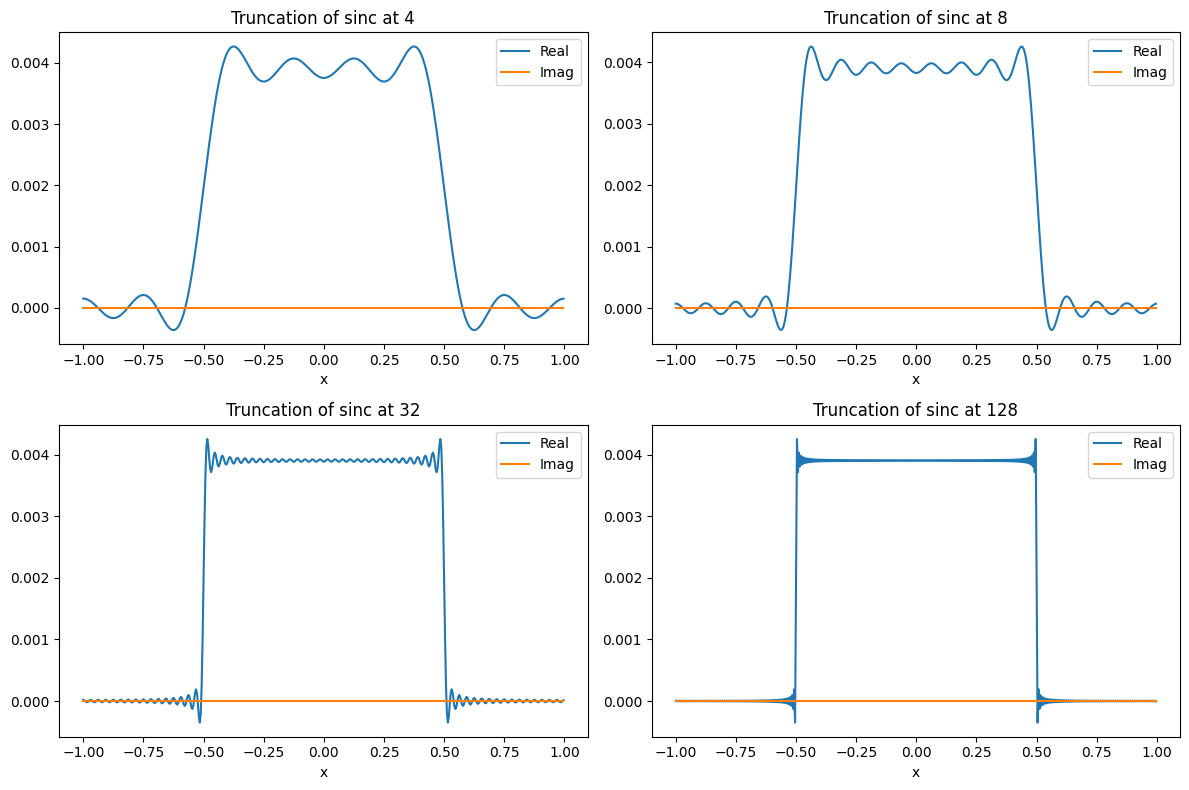

In [7]:
N = 512
kxmax = 128
kx = np.linspace(-N/2, N/2-1, N) * (2 * kxmax) / N
x = np.linspace(-N/2, N/2-1, N) / (2 * kxmax)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
kxmax_truncate_list = [4, 8, 32, 128]
for idx, kxmax_truncate in enumerate(kxmax_truncate_list):
    F = np.sinc(kx)
    F[np.abs(kx) > kxmax_truncate] = 0

    f = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(F)))
    ax = axs[idx // 2, idx % 2]
    ax.plot(x, np.real(f), label='Real')
    ax.plot(x, np.imag(f), label='Imag')
    ax.set_title(f'Truncation of sinc at {kxmax_truncate}')
    ax.set_xlabel('x')
    ax.legend()
plt.tight_layout()
plt.show()


## Point Spread function (PSF) Analysis

Point spread function (PSF) analysis is a powerful tool for characterizing linear systems, including MRI.  The basic process of PSF analysis is to input an ideal "point" object, represented by a delta function, into the system, here denoted by $\mathcal{H}()$, and observe the resulting output, which is the PSF.

$$ psf(x) = \mathcal{H}(\delta(x)) $$

In MRI, PSF analysis is often performed starting in the spatial frequency, or k-space, domain, since this is where data is sampled and this is where we typically need to characterize the MRI system.  Since the Fourier Transform of the input point object is $\mathcal{f}(\delta(x)) = 1$, then the Fourier Transform of the PSF is simply

$$ PSF(k_x) = \mathcal{F}\{psf(x)\} $$

Fourier Transform identities then show that, when imaging a real object, $f(x)$, it will be convolved by the point spread function in the actual image reconstructed, $\hat{f}(x)$:

$$ \hat{f}(x) = \mathcal{F}^{-1}\{\hat{F}(k_x)\} = \mathcal{F}^{-1}\{F(k_x) PSF(k_x)\} = f(x) \ast psf(x) $$



## Discrete Fourier Transform

The discrete Fourier transform (DFT) is used to perform Fourier analysis of the frequencies present in a signal from discretely sampled data.  It transforms a discrete set of values, $f[x_n], x_n = 0, 1, 2, ... N-1 $, into their frequency coefficients, $F[k_n], k_n = 0, 1, 2, ... N-1 $ with the following formula.

$$F[k_n] = \sum_{x_n=0}^{N-1} f[x_n] \exp(-i 2 \pi k_n x_n/N)$$

The formulation is extremely similar to the Fourier transform, and thus many of the Fourier transform identities and pairs still apply when using the DFT.  It is also extended similarly into multiple dimensions.

Practically, the DFT is computed using the Fast Fourier Transform (FFT) algorithm.

The DFT can be analyzed starting from the (continuous) FT by incorporating the effects of sampling using the impulse train function, $Ш(x)$.